# **Realce**

## Imports

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Carregando Imagem em Preto e Branco

In [3]:
img = cv2.cvtColor(cv2.imread("exemplo.jpg"), cv2.COLOR_BGR2GRAY)

## Apresentando imagem

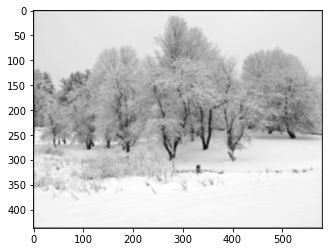

In [4]:
plt.imshow(img, cmap="gray")
plt.show()

## Histograma

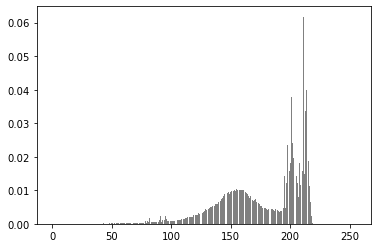

In [5]:
def histograma(img):
    row, col = img.shape
    hist = np.zeros((256), dtype='uint32')

    for r in range(row):
        for c in range(col):
            hist[img[r][c]] += 1
    return hist

#Apresenta o histograma
row, col = img.shape
h = histograma(img)
h = h/(row*col)
x = np.arange(0,256)
plt.bar(x,h,color="gray",align="center")
plt.show()

## Função de Distribuição Acumulada

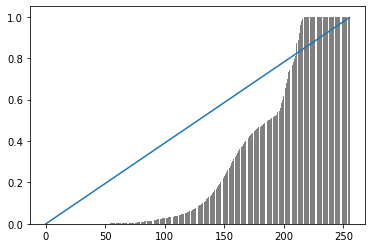

In [48]:
def histograma_cdf(img):  #Cumulative Distribution Function
    hist = histograma(img)

    hist_acum = np.cumsum(hist)
    return hist_acum

#Apresenta o CDF
row, col = img.shape
h = histograma_cdf(img)
h = h/(row*col)
x = np.arange(0,256)
plt.bar(x,h,color="gray",align="center")

identity_x = np.arange(0,256)
identity_y = np.arange(0,256)/256.0

plt.plot(identity_x, identity_y)
plt.show()


## Equalização de Histograma

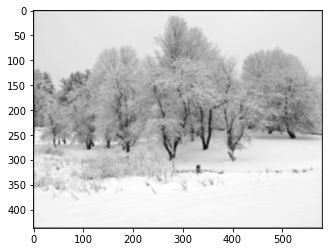

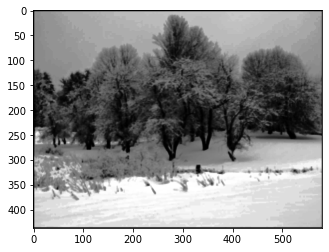

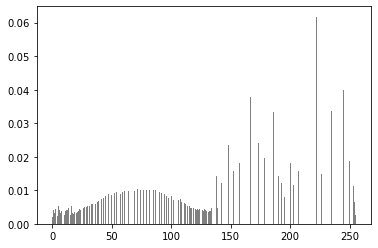

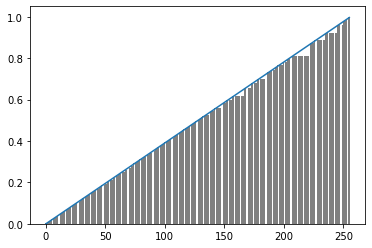

In [50]:
def histogram_equalization(img):
    row, col = img.shape

    h = histograma_cdf(img)
    h = h/(row*col) #Normaliza
    
    pixel_map = np.around(h*255)

    new_image = np.zeros(img.shape, dtype='uint8')

    for i in range(row):
        for j in range(col):
            new_image[i][j] = pixel_map[img[i][j]]

    return new_image

#Apresenta a imagem  
plt.imshow(img, cmap="gray")
plt.show()

#Apresenta a imagem com histograma equalizado
equalized_img = histogram_equalization(img)
plt.imshow(equalized_img, cmap="gray")
plt.show()

#Apresenta o novo histograma
row, col = img.shape
h = histograma(equalized_img)
h = h/(row*col)
x = np.arange(0,256)
plt.bar(x,h,color="gray",align="center")
plt.show()

#Apresenta o novo CDF
row, col = img.shape
h = histograma_cdf(equalized_img)
h = h/(row*col)
x = np.arange(0,256)
plt.bar(x,h,color="gray",align="center")

identity_x = np.arange(0,256)
identity_y = np.arange(0,256)/256.0

plt.plot(identity_x, identity_y)
plt.show()